In [1]:
import numpy as np
import scipy
from scipy.linalg import expm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
from qiskit import Aer
from qiskit import BasicAer
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.aqua.input import ClassificationInput
from qiskit.aqua import run_algorithm, QuantumInstance
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
# setup aqua logging


In [3]:
import logging
from qiskit.aqua import set_qiskit_aqua_logging
set_qiskit_aqua_logging(logging.DEBUG)  # choose INFO, DEBUG to see the log
import numpy as np

In [5]:
class_labels = [r'A', r'B']
data, target = datasets.load_breast_cancer(True)
print(data.shape)
print(target.shape)
sample_train, sample_test, label_train, label_test = train_test_split(data, target, test_size=0.3, random_state=12)

(569, 30)
(569,)


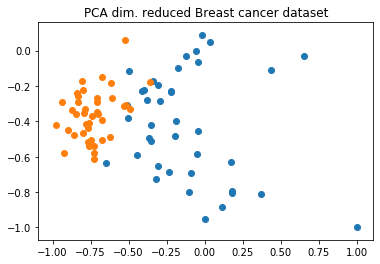

In [6]:
n = 2  # dimension of each data point
sample_Total, training_input, test_input, class_labels = Breast_cancer(training_size=40,
                                                              test_size=10, n=n, PLOT_DATA=True)

In [7]:
temp = [test_input[k] for k in test_input]
total_array = np.concatenate(temp)
print(len(total_array))

20


In [8]:
# Now we standarize for gaussian around 0 with unit variance
std_scale = StandardScaler().fit(sample_train)
#print(std_scale)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)
print(sample_train.shape)
print(sample_test.shape)

(398, 30)
(171, 30)


In [9]:
aqua_dict = {
    'problem': {'name': 'classification', 'random_seed': 100},
    'algorithm': {
        'name': 'QSVM'
    },
    'backend': {'provider': 'qiskit.BasicAer', 'name': 'qasm_simulator', 'shots': 256},
    'feature_map': {'name': 'SecondOrderExpansion', 'depth': 2, 'entanglement': 'linear'}
} 

In [10]:
algo_input = ClassificationInput(training_input, test_input, total_array)


2020-03-06 16:56:41,988:qiskit.aqua.parser.json_schema:DEBUG: Input: {
    "datapoints": [
        [
            -0.04148539732749179,
            0.007297718453288915
        ],
        [
            -0.14435285369447398,
            -0.6599389405508712
        ],
        [
            0.15241691598243945,
            -0.2185392790375602
        ],
        [
            -0.2109626433866345,
            0.018424851633274786
        ],
        [
            -0.4318511713124525,
            -0.2599765178623966
        ],
        [
            -0.03425186221184662,
            -0.6954644039797568
        ],
        [
            -0.36281669913378534,
            -0.43883964463058994
        ],
        [
            -0.1481808936570485,
            -0.5713013961962039
        ],
        [
            -0.12588431629755803,
            -0.47640977873572243
        ],
        [
            -0.2363201634228039,
            0.08046722656449756
        ],
        [
            -0.658399980997027

2020-03-06 16:56:41,990:qiskit.aqua.parser.json_schema:DEBUG: Input Schema: {
    "$schema": "http://json-schema.org/schema#",
    "additionalProperties": false,
    "id": "classification_input_schema",
    "properties": {
        "datapoints": {
            "default": null,
            "type": [
                "array",
                "null"
            ]
        },
        "test_dataset": {
            "default": null,
            "type": [
                "object",
                "null"
            ]
        },
        "training_dataset": {
            "default": null,
            "type": [
                "object",
                "null"
            ]
        }
    },
    "type": "object"
}


In [11]:
result = run_algorithm(aqua_dict, algo_input)


2020-03-06 16:56:47,868:qiskit.aqua.algorithms.classical.cplex.simple_cplex:INFO: CPLEX is not installed. See https://www.ibm.com/support/knowledgecenter/SSSA5P_12.8.0/ilog.odms.studio.help/Optimization_Studio/topics/COS_home.html
2020-03-06 16:56:47,870:qiskit.aqua.algorithms.classical.cplex.cplex_ising:DEBUG: CPLEX is not installed. See https://www.ibm.com/support/knowledgecenter/SSSA5P_12.8.0/ilog.odms.studio.help/Optimization_Studio/topics/COS_home.html No module named 'cplex'
2020-03-06 16:56:47,871:qiskit.aqua._discover:DEBUG: 'CPLEX is not installed. See https://www.ibm.com/support/knowledgecenter/SSSA5P_12.8.0/ilog.odms.studio.help/Optimization_Studio/topics/COS_home.html'
2020-03-06 16:56:47,871:qiskit.aqua._discover:DEBUG: Failed to load pluggable qiskit.aqua.algorithms.classical.cplex.cplex_ising error "Could not register class <class 'qiskit.aqua.algorithms.classical.cplex.cplex_ising.CPLEX_Ising'>. Name CPLEX.Ising is not valid"
2020-03-06 16:56:47,874:qiskit.aqua.algorith

2020-03-06 16:56:48,776:qiskit.aqua._discover:DEBUG: Found: 'input' has pluggables ['ClassificationInput', 'EnergyInput', 'LinearSystemInput', 'QGANInput'] 
2020-03-06 16:56:54,877:qiskit.aqua.utils.backend_utils:INFO: Enabled IBMQ account.
2020-03-06 16:56:55,908:qiskit.aqua.parser.json_schema:DEBUG: Input: {
    "algorithm": {
        "name": "QSVM"
    },
    "backend": {
        "basis_gates": null,
        "coupling_map": null,
        "coupling_map_from_device": null,
        "initial_layout": null,
        "max_credits": 10,
        "name": "qasm_simulator",
        "provider": "qiskit.BasicAer",
        "shots": 256,
        "skip_transpiler": false
    },
    "feature_map": {
        "depth": 2,
        "entanglement": "linear",
        "entangler_map": null,
        "name": "SecondOrderExpansion"
    },
    "input": {
        "datapoints": null,
        "name": "ClassificationInput",
        "test_dataset": null,
        "training_dataset": null
    },
    "problem": {
      

2020-03-06 16:56:55,918:qiskit.aqua.qiskit_aqua:DEBUG: Algorithm Input: {
    "algorithm": {
        "name": "QSVM"
    },
    "backend": {
        "basis_gates": null,
        "coupling_map": null,
        "coupling_map_from_device": null,
        "initial_layout": null,
        "max_credits": 10,
        "name": "qasm_simulator",
        "provider": "qiskit.BasicAer",
        "shots": 256,
        "skip_transpiler": false
    },
    "feature_map": {
        "depth": 2,
        "entanglement": "linear",
        "entangler_map": null,
        "name": "SecondOrderExpansion"
    },
    "input": {
        "datapoints": null,
        "name": "ClassificationInput",
        "test_dataset": null,
        "training_dataset": null
    },
    "problem": {
        "circuit_cache_file": null,
        "circuit_caching": false,
        "circuit_optimization_level": "default",
        "measurement_error_mitigation": false,
        "measurement_error_mitigation_refresh_period": 30,
        "measuremen

'kernel_matrix_training' : [[1.         0.828125   0.63671875 ... 0.54296875 0.53515625 0.6953125 ]
 [0.828125   1.         0.53125    ... 0.3515625  0.4375     0.55859375]
 [0.63671875 0.53125    1.         ... 0.6953125  0.390625   0.93359375]
 ...
 [0.54296875 0.3515625  0.6953125  ... 1.         0.76953125 0.57421875]
 [0.53515625 0.4375     0.390625   ... 0.76953125 1.         0.40234375]
 [0.6953125  0.55859375 0.93359375 ... 0.57421875 0.40234375 1.        ]]
'svm' : {'alphas': array([1.36579610e+01, 9.30614709e+00, 7.41934837e+01, 1.63184689e+00,
       3.60512113e+01, 7.44995003e+00, 1.15846493e+02, 5.18915365e+00,
       2.64872460e+00, 5.53055338e+00, 3.00045247e+01, 6.02692743e-01,
       6.13585097e+01, 2.34421431e+02, 4.17686891e+00, 1.02300374e+02,
       1.54762362e+02, 6.80471175e+02, 2.65238140e+01, 1.93996663e+01,
       1.91336581e+01, 1.80326648e+01, 1.26428491e+01, 7.56388163e-02,
       3.94034990e+00, 1.15129624e+01, 5.94553124e+00, 5.44377537e+01,
       4.9035

In [12]:
for k,v in result.items():
    print("'{}' : {}".format(k, v))

'kernel_matrix_training' : [[1.         0.828125   0.63671875 ... 0.54296875 0.53515625 0.6953125 ]
 [0.828125   1.         0.53125    ... 0.3515625  0.4375     0.55859375]
 [0.63671875 0.53125    1.         ... 0.6953125  0.390625   0.93359375]
 ...
 [0.54296875 0.3515625  0.6953125  ... 1.         0.76953125 0.57421875]
 [0.53515625 0.4375     0.390625   ... 0.76953125 1.         0.40234375]
 [0.6953125  0.55859375 0.93359375 ... 0.57421875 0.40234375 1.        ]]
'svm' : {'alphas': array([1.36579610e+01, 9.30614709e+00, 7.41934837e+01, 1.63184689e+00,
       3.60512113e+01, 7.44995003e+00, 1.15846493e+02, 5.18915365e+00,
       2.64872460e+00, 5.53055338e+00, 3.00045247e+01, 6.02692743e-01,
       6.13585097e+01, 2.34421431e+02, 4.17686891e+00, 1.02300374e+02,
       1.54762362e+02, 6.80471175e+02, 2.65238140e+01, 1.93996663e+01,
       1.91336581e+01, 1.80326648e+01, 1.26428491e+01, 7.56388163e-02,
       3.94034990e+00, 1.15129624e+01, 5.94553124e+00, 5.44377537e+01,
       4.9035

In [20]:
pca = PCA(n_components=2).fit(sample_train)
print(pca)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)
print(sample_train.shape)
print(sample_test.shape)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
(398, 2)
(171, 2)


In [23]:
# Scale to the range (-1,+1)
samples = np.append(sample_train, sample_test, axis=0)
print(samples.shape)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
sample_train = minmax_scale.transform(sample_train)
sample_test = minmax_scale.transform(sample_test)
print(sample_train.shape)
print(sample_test.shape)

(569, 2)
(398, 2)
(171, 2)


In [24]:
# Pick training size number of samples from each distro
training_input = {key: (sample_train[label_train == k, :])[:training_size] for k, key in enumerate(class_labels)}
test_input = {key: (sample_train[label_train == k, :])[training_size:(
    training_size+test_size)] for k, key in enumerate(class_labels)}

NameError: name 'training_size' is not defined

In [4]:
def Breast_cancer(training_size, test_size, n, PLOT_DATA):
    class_labels = [r'A', r'B']
    data, target = datasets.load_breast_cancer(True)
    sample_train, sample_test, label_train, label_test = train_test_split(data, target, test_size=0.3, random_state=12)

    # Now we standarize for gaussian around 0 with unit variance
    std_scale = StandardScaler().fit(sample_train)
    sample_train = std_scale.transform(sample_train)
    sample_test = std_scale.transform(sample_test)

    # Now reduce number of features to number of qubits
    pca = PCA(n_components=n).fit(sample_train)
    sample_train = pca.transform(sample_train)
    sample_test = pca.transform(sample_test)

    # Scale to the range (-1,+1)
    samples = np.append(sample_train, sample_test, axis=0)
    minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
    sample_train = minmax_scale.transform(sample_train)
    sample_test = minmax_scale.transform(sample_test)

    # Pick training size number of samples from each distro
    training_input = {key: (sample_train[label_train == k, :])[:training_size] for k, key in enumerate(class_labels)}
    test_input = {key: (sample_train[label_train == k, :])[training_size:(
        training_size+test_size)] for k, key in enumerate(class_labels)}

    if PLOT_DATA:
        for k in range(0, 2):
            plt.scatter(sample_train[label_train == k, 0][:training_size],
                        sample_train[label_train == k, 1][:training_size])

        plt.title("PCA dim. reduced Breast cancer dataset")
        plt.show()

    return sample_train, training_input, test_input, class_labels